## Dream Masters Program Analysis
### *By Rohit Kumar Singh And Ranjith Kumar Govindarajan*


<img src="https://d8it4huxumps7.cloudfront.net/bites/wp-content/uploads/2019/06/12123927/du-admission.jpg" width="80%">

### University admissions can be confusing and stressful. Most of the times, in order to know the status of admission it can take up a lot of time.

### This kernel mainly focuses on what parameters are important for a student to get into post graduate college. By the end of this kernel it will be clear of what are the scores required for different tests to have better admission chances and get into a dream masters program?

# Table of Content
<ol>
<li>Importing Modules</li>
<li>Loading the data</li>
<li>Information about data</li>
<li>Summary of Data</li>
    <li>Getting the correlated features</li>
<li>Outlier Detection</li>
<li>Data Analysis</li>
<li>Standardization</li>
<li>Predictive Analysis</li>


# 1.Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


# 2.Loading the data

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df = df.drop(['Serial No.'], axis=1)
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
df.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
394,329,111,4,4.5,4.0,9.23,1,0.89
113,320,110,2,4.0,3.5,8.56,0,0.72
24,336,119,5,4.0,3.5,9.80,1,0.97
116,299,102,3,4.0,3.5,8.62,0,0.56
135,314,109,4,3.5,4.0,8.77,1,0.82


# 3.Information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# 4.Summary of Data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### Visualizing the Target Feature's Distribution

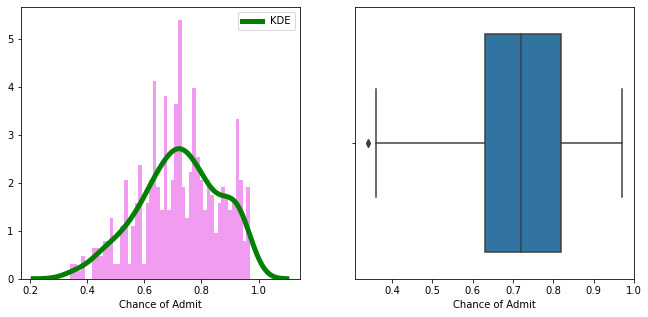

In [5]:
plt.figure(figsize = (11,11))
plt.subplot(2,2,1)
sns.distplot(df['Chance of Admit'],bins=50,color='Violet', kde_kws={"color": "g", "lw": 5, "label": "KDE"},hist_kws={"linewidth": 5,"alpha": 0.8 })
plt.subplot(2,2,2)
sns.boxplot(df['Chance of Admit'])

# 5.Getting the Correlated Features

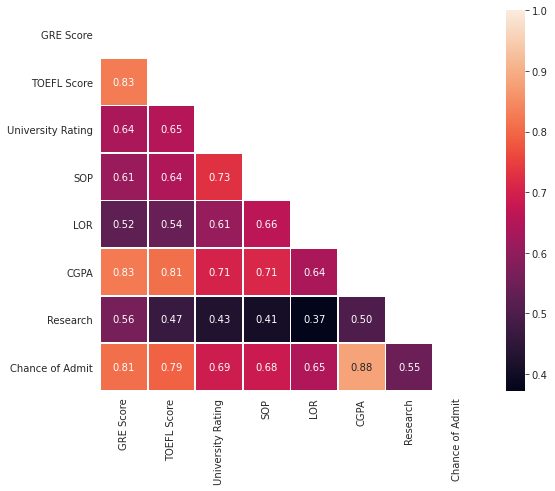

In [6]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,color = 'orange')


### Let's plot the pairwise relationship between important attributes.

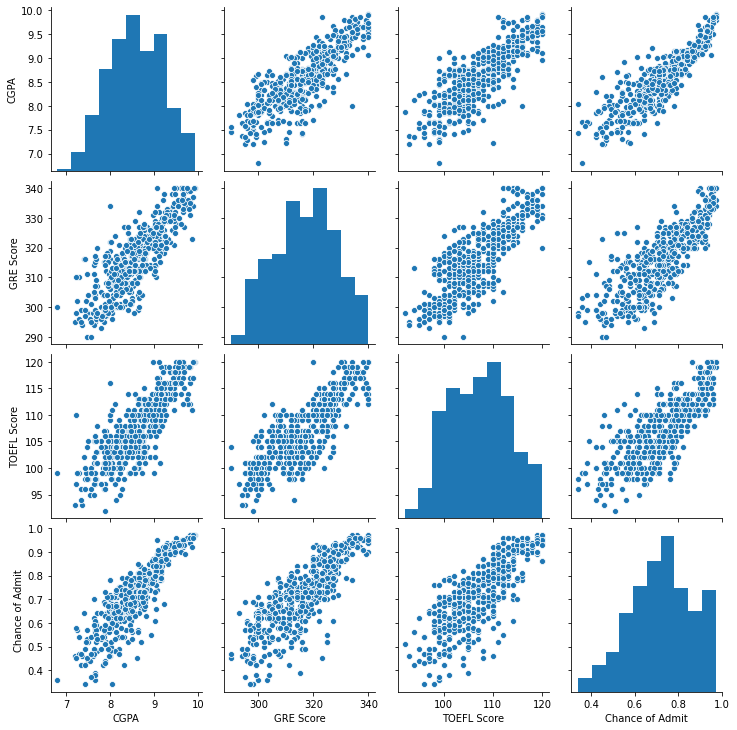

In [7]:
df1 = df[['CGPA','GRE Score','TOEFL Score','Chance of Admit']]
sns.pairplot(df1)

# 6. OUTLIER DETECTION USING Z-SCORE METHOD

In [8]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [9]:
out = outlier(df)

There are 9 outliers in GRE Score feature
There are 9 outliers in TOEFL Score feature
There are 0 outliers in University Rating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR feature
There are 9 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance of Admit feature


In [10]:
#Removing the outlier by replace all the outliers values with np.nan and will delete them using dropna method
j =0
columns =df.columns
for i in out:
    for val in df[columns[j]]:
        if val in i:
            df[columns[j]]= df[columns[j]].replace(val,np.nan)
    j =j+1
    
df.dropna(axis = 0,inplace =True)

# 7. Data Analysis

<img src="https://www.import.io/wp-content/uploads/2019/09/data-analysis-blog.jpg" width="50%">

We are trying to answer the following questions:
1. Does the Student from top universities are doing research papers?
2. Does research paper really having a good impact in admission?
3. Does the student who is academically good, doing well in GRE and TOEFL?
4. Who are the toppers in GRE, the students from top universities or normal universities?
5. Do GRE & TOEFL scores influence the chance of getting admitted?
6. Comparative analysis of academic performance of students with research paper and without research paper.
7. Does the University Rating influence SOP and LOR Rating?
8. What is the average SOP, LOR & University Rating of students who got admitted?

    * 4 more bonus questions and analysis.

## 7.1. Does the Student from top universities are doing research papers?

In [11]:
px.strip(df, x="CGPA", y="Research", orientation="h", color="University Rating")

### Conclusion: <b>Mostly the students from top univerties with ratings more than 3 are releasing research papers and also they are scoring good CGPA(>8)</b>

## 7.2. Does research paper really having a good impact in admission?

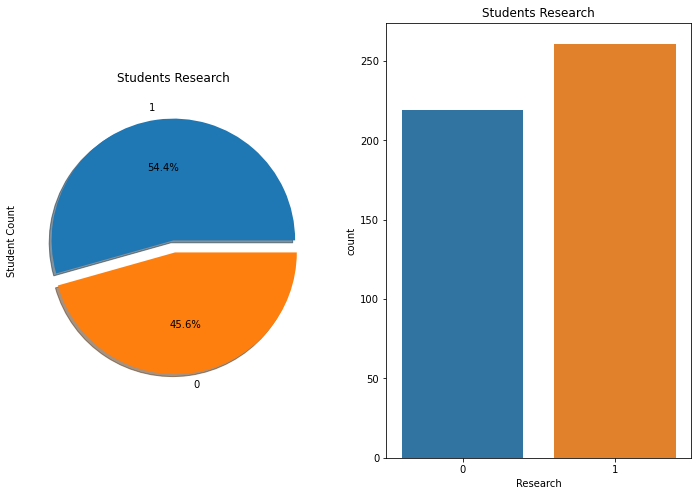

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=df,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

#### **Conclusion** : We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research. Doing research does add practical knowledge and increases the student skill of working with groups or teams.

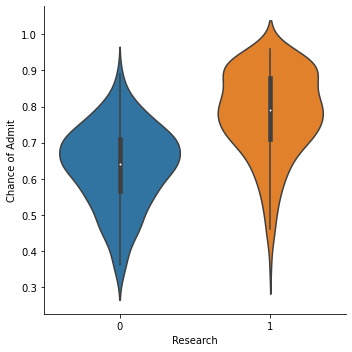

In [13]:
sns.catplot(x ='Research', y='Chance of Admit',data=df , kind="violin" )
plt.show()

### Conclusion : Yes, Chance of Admission increases if one does Research.

## 7.3. Does the student who is academically good, doing well in GRE and TOEFL?

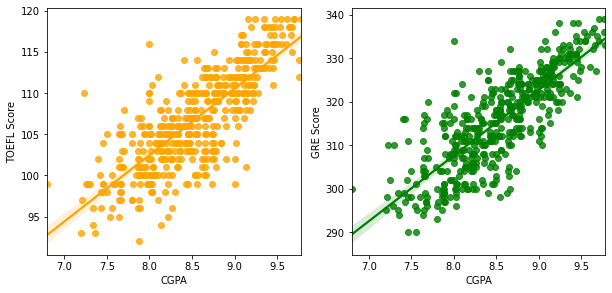

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.regplot(df['CGPA'],df['TOEFL Score'],color ='orange')
plt.subplot(2,2,2)
sns.regplot(df['CGPA'],df['GRE Score'],color ='green')

### Conclusion: <b>Yes it is!!!<br/>
### The Academic toppers are the top scorers in both TOEFL and GRE</b>

### BONUS : 3-D Visualization of CGPA, GRE Score and TOEFL Score.

In [15]:
fig = px.scatter_3d(df, x="CGPA", y="GRE Score", z="TOEFL Score", hover_name="Chance of Admit")
fig.show()


## 7.4. Who are the toppers in GRE, the students from top universities or normal universities?


In [16]:
px.scatter(df, x="TOEFL Score", y="GRE Score", color="University Rating", marginal_y="violin",
           marginal_x="box")

### Conclusion:<b> Yes it is!!!<br/>
### The top scorers in GRE and TOEFL are mostly from the University with Ratings more than 4.

## 7.5. Do GRE & TOEFL scores influence the chance of getting admitted?

In [17]:
cor=df.corr()['Chance of Admit']
cor1 = cor.head(2)
import plotly.graph_objects as go


layout = dict(title = 'Influence on Chance of getting admitted',
              xaxis = dict(title = 'Exams'),
              yaxis = dict(title = 'Coorelation Value (Out of 1)'),
              width = 500,
              height = 500
              )
fig = go.Figure(data=[go.Scatter(
    x=['GRE Score', 'TOEFL Score'],
    y=[cor1[0],cor1[1]],
    mode='markers',
    marker=dict(
        color=[cor1[0]* 100,cor1[1]*100],
        size=[cor1[0]* 75,cor1[1]*75],
        showscale=True
        )
)],layout=layout)

fig.show()

### **Conclusion :** Here we can see that the chance of admit is highly correlated with GRE and TOEFEL scores.

# 7.6. Comparative analysis of academic performance of students with research paper and without research paper

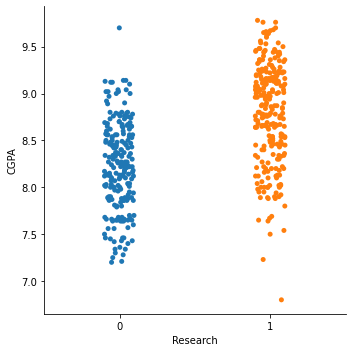

In [18]:
sns.catplot(x= 'Research',y = 'CGPA',data =df)

### <b> Conclusion:The students with research papers have scored high CGPA which tells that active learning helps the student.</b>

## 7.7. Does the University Rating influence SOP and LOR Rating?

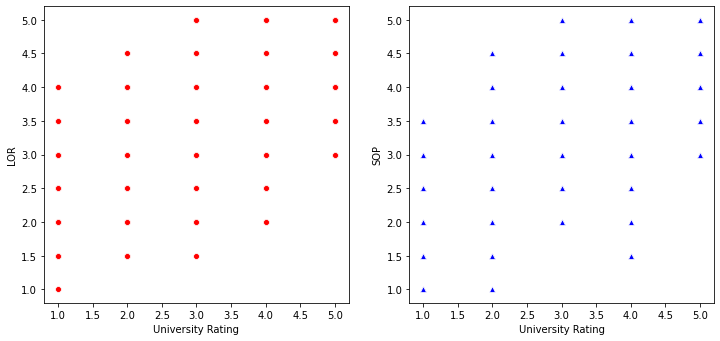

In [19]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
sns.scatterplot(x='University Rating',y='LOR',data=df,color='Red')
plt.subplot(2,2,2)
sns.scatterplot(x='University Rating',y='SOP',data=df,color='Blue', marker="^")

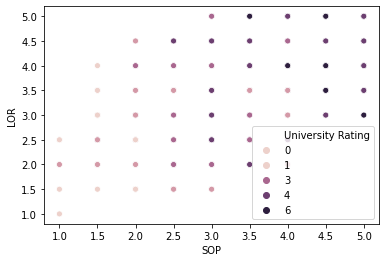

In [20]:
sns.scatterplot(data=df,x='SOP',y='LOR',hue='University Rating')

### Conclusion : With increase in ratings of university, the rating of LOR and SOP also increases.

## 7.8. What is the average SOP, LOR & University Rating of students who got admitted?

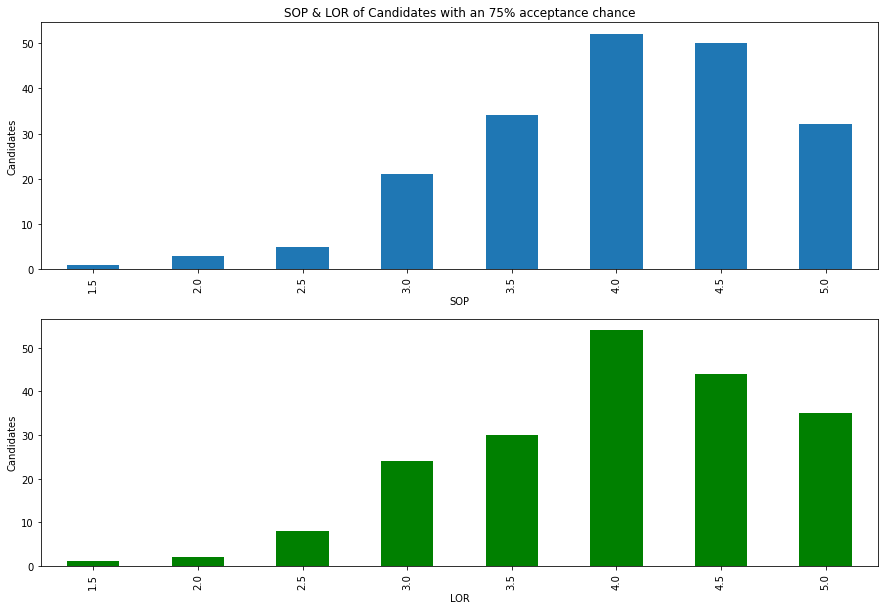

In [21]:
# Assumption : We think having more than 75% chance of admission is very descent possibility.
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
s1 = df[df["Chance of Admit"] >= 0.75]["SOP"].value_counts().sort_index()
plt.title("SOP & LOR of Candidates with an 75% acceptance chance")
s1.plot(kind='bar',linestyle='dashed',linewidth=5)
plt.xlabel("SOP")
plt.ylabel("Candidates")
plt.subplot(2, 1, 2)
s2 = df[df["Chance of Admit"] >= 0.75]["LOR"].value_counts().sort_index()
s2.plot(kind='bar',linestyle='dashed',linewidth=5,color="green")
plt.xlabel("LOR")
plt.ylabel("Candidates")
plt.show()

In [22]:
df2 = df[df["Chance of Admit"] > 0.75]
print("Candidates with an 75% acceptance chance")
print("Average SOP Rating : {0:.2f} out of 5".format(df2['SOP'].mean()))
print('Average LOR Rating: {0:.2f} out of 5'.format(df2['LOR'].mean()))
print("Average University Rating Rating : {0:.2f} out of 5".format(df2['University Rating'].mean()))

Candidates with an 75% acceptance chance
Average SOP Rating : 4.05 out of 5
Average LOR Rating: 4.03 out of 5
Average University Rating Rating : 3.90 out of 5


## BONUS: What should be your Scores for 90 % Chance of Admission?

In [23]:
print('Your Scores for 90 % Chance of Admission')
print(df[(df['Chance of Admit']>0.90)].mean())

Your Scores for 90 % Chance of Admission
GRE Score            331.386364
TOEFL Score          115.954545
University Rating      4.659091
SOP                    4.545455
LOR                    4.477273
CGPA                   9.455682
Research               1.000000
Chance of Admit        0.929091
dtype: float64


### Conclusion : For having a 90% Chance to get admission one should have GRE=333.61, TOEFL=116.28, CGPA=9.53.
#### If you get scores more than this then your chances of admission are very good.

## BONUS: What is the analysis of Academic, TOEFL and GRE Toppers ?

Assumption  Academic Toppers > 9.6 CGPA ; 
            GRE Toppers > 335 marks ; 
            TOEFL Topper > 115 marks ;

There are 12 university toppers


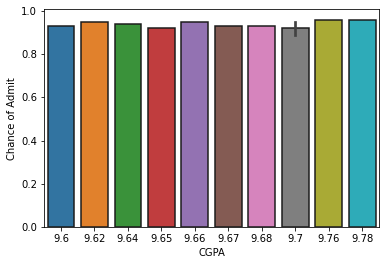

In [24]:
toppers=df[df['CGPA']>=9.6].sort_values(by=['CGPA'],ascending=False)
print('There are {} university toppers'.format(len(toppers)))
sns.barplot(x='CGPA',y='Chance of Admit',data=toppers, linewidth=1.5,edgecolor="0.1")

There are 13 GRE toppers
There are 25 TOEFL toppers


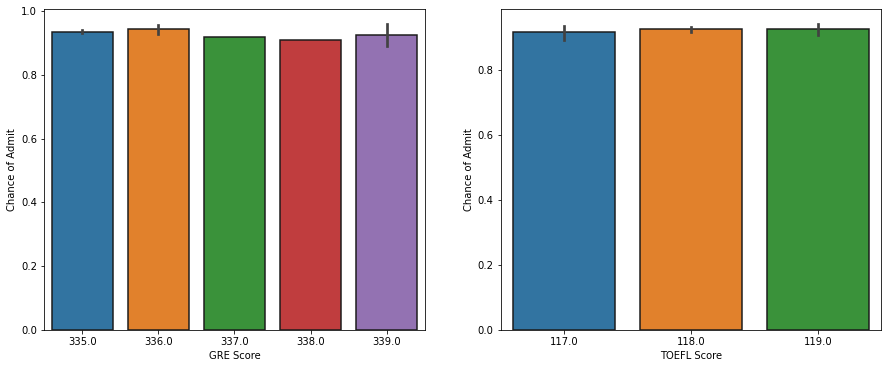

In [25]:
GREtoppers=df[df['GRE Score']>=335].sort_values(by=['GRE Score'],ascending=False)
Toefltoppers=df[df['TOEFL Score']>=117].sort_values(by=['TOEFL Score'],ascending=False)
plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
print('There are {} GRE toppers'.format(len(GREtoppers)))
sns.barplot(x='GRE Score',y='Chance of Admit',data=GREtoppers, linewidth=1.5,edgecolor="0.1")
plt.subplot(2,2,2)
print('There are {} TOEFL toppers'.format(len(Toefltoppers)))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=Toefltoppers, linewidth=1.5,edgecolor="0.1")

## BONUS: What should be your Scores in each to be among Top 15 person to have Chance of Admission?

In [26]:
df3 = df.sort_values('Chance of Admit', ascending=False)
df3.head(15)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
213,333.0,119.0,5,5.0,4.5,9.78,1,0.96
71,336.0,112.0,5,5.0,5.0,9.76,1,0.96
130,339.0,114.0,5,4.0,4.5,9.76,1,0.96
23,334.0,119.0,5,5.0,4.5,9.70,1,0.95
399,333.0,117.0,4,5.0,4.0,9.66,1,0.95
372,336.0,119.0,4,4.5,4.0,9.62,1,0.95
423,334.0,119.0,5,4.5,5.0,9.54,1,0.94
70,332.0,118.0,5,5.0,5.0,9.64,1,0.94
22,328.0,116.0,5,5.0,5.0,9.50,1,0.94
214,331.0,117.0,4,4.5,5.0,9.42,1,0.94


In [27]:
print("To be among top 15 to get admission one should have")
print(df3.mean().reset_index())

To be among top 15 to get admission one should have
               index           0
0          GRE Score  315.670833
1        TOEFL Score  106.781250
2  University Rating    3.056250
3                SOP    3.328125
4                LOR    3.439583
5               CGPA    8.532646
6           Research    0.543750
7    Chance of Admit    0.712625


### Conclusion : To be among top 15 to get admission one should have GRE=337.33, TOEFL=117.26, CGPA=9.72 , University Ranking = 4.60.

If you get scores more than above required scores then your chances of admission are almost sure.

## BONUS: Define the relationship between LOR to CGPA and Research.

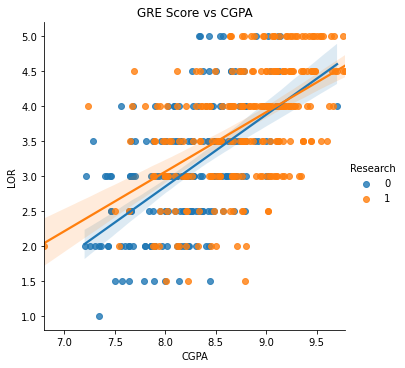

In [28]:
fig = sns.lmplot(x="CGPA", y="LOR", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

### Conclusion : LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence.
#### Having research experience is usually related with a good LOR as supervisors have personal interaction with the students performing research which usually results in good LORs.

## Finally how do the details about research papers, CGPA, university rating, TOEFL and GRE score predicts the chance of getting admissions…


In [29]:
X = df[['GRE Score','TOEFL Score','University Rating','CGPA','Research']]
y = df['Chance of Admit']

## 8.Performing Standard Scaling

In [30]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_ss = ss.fit_transform(X)

# 9.Spliting into training and testing set

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

# 10.Predictive Modelling

In [32]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR 
from sklearn.linear_model import Ridge as RR

In [33]:
models={'Linear Regression':LR(),'Decision Tree Regression':DTR(),'Random Forest Regression':RFR(),'Gradient Boosting Regression':GBR(),'Ada Boosting Regression':ABR(),'K-Neighbors Regression':KNR(),'Support Vector Regression':SVR(),'Ridge Regression':RR()}
pred =[]
print(models.keys())

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Ada Boosting Regression', 'K-Neighbors Regression', 'Support Vector Regression', 'Ridge Regression'])


In [34]:
from sklearn.metrics import r2_score
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc=r2_score(y_test, predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.7633591517711498
Decision Tree Regression 0.44247552290079073
Random Forest Regression 0.7010895718110702
Gradient Boosting Regression 0.7366346070296708
Ada Boosting Regression 0.7271869070276686
K-Neighbors Regression 0.591216177044829
Support Vector Regression 0.5747083714216271
Ridge Regression 0.7624408186173259


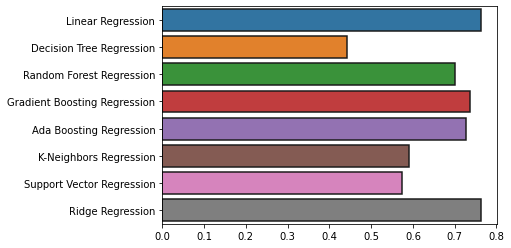

In [35]:
sns.barplot(y=list(models.keys()),x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

# As the accuracy is high for linear regression we will use it as our final model....

In [36]:
final = LR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)

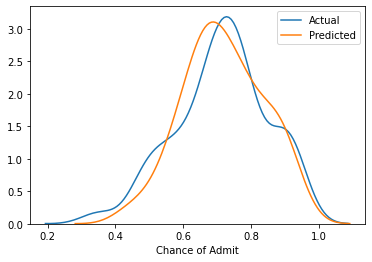

In [37]:
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')

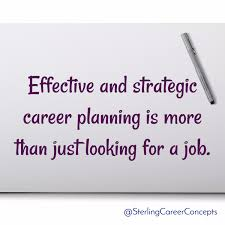

# 11.Conclusion
1. Does the Student from top universities are doing research papers?
2. Does research paper really having a good impact in admission?
3. Does the student who is academically good, doing well in GRE and TOEFL?
4. Who are the toppers in GRE, the students from top universities or normal universities?
5. Do GRE & TOEFL scores influence the chance of getting admitted?
6. Comparative analysis of academic performance of students with research paper and without research paper.
7. Does the University Rating influence SOP and LOR Rating?
8. What is the average SOP, LOR & University Rating of students who got admitted?

(First image credit goes to - https://d8it4huxumps7.cloudfront.net/bites/wp-content/uploads/2019/06/12123927/du-admission.jpg)

(Second image credit goes to - https://www.import.io/wp-content/uploads/2019/09/data-analysis-blog.jpg)

**Thank You for reading our work. If you like it, please UPVOTE. It will motivate us to keep adding content and share with you.**